In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
# Đọc dữ liệu
df = pd.read_csv('heart_rate.csv')

# Trung bình 4 kênh nhịp tim (giả sử tên cột là T1, T2, T3, T4)
df["mean_hr"] = df[["T1", "T2", "T3", "T4"]].mean(axis=1)

# Thông số dữ liệu
data_length = len(df)
points_per_hour = data_length // 24
sampling_interval = 5  # mỗi mẫu cách nhau 5 giây

In [3]:
# Phân tích phổ theo giờ
spectra = []
for i in range(24):
    segment = df["mean_hr"].iloc[i*points_per_hour:(i+1)*points_per_hour].values
    segment -= np.mean(segment)
    yf = np.abs(fft(segment))[:len(segment)//2]
    xf = fftfreq(len(segment), d=sampling_interval)[:len(segment)//2]
    spectra.append((xf, yf))

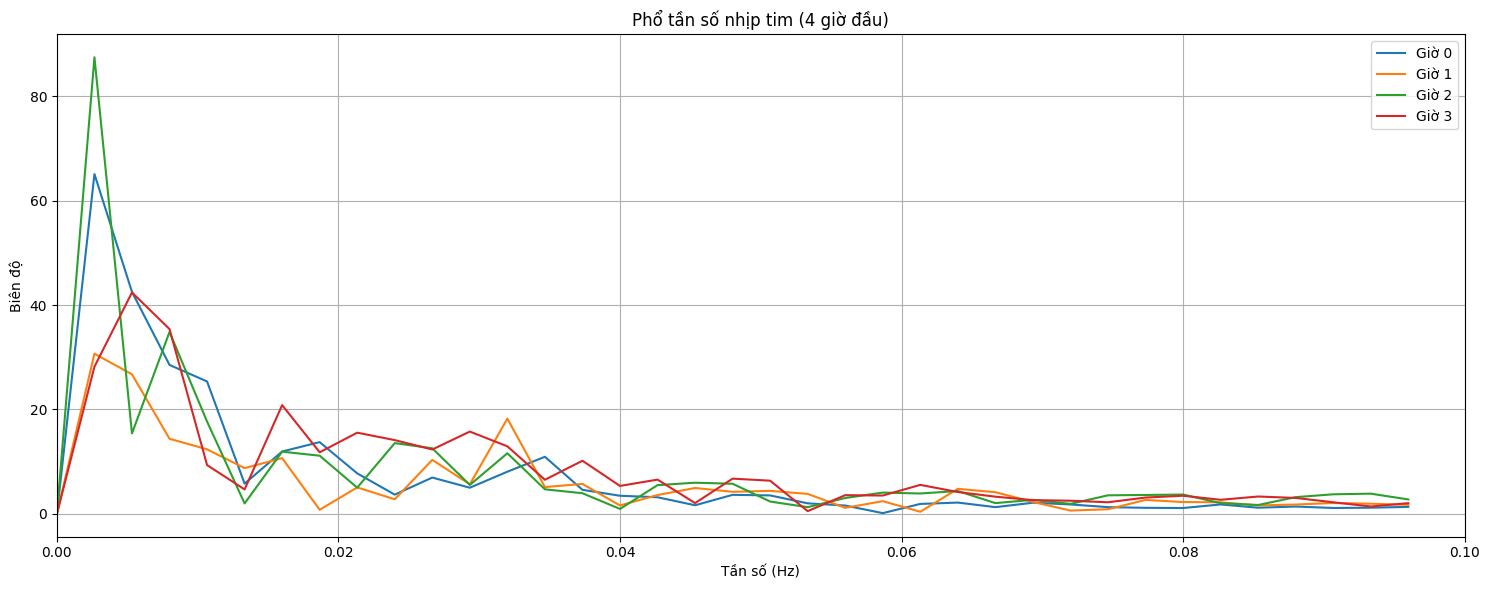

In [4]:
# Vẽ phổ 4 giờ đầu
plt.figure(figsize=(15, 6))
for i in range(4):
    plt.plot(spectra[i][0], spectra[i][1], label=f"Giờ {i}")
plt.title("Phổ tần số nhịp tim (4 giờ đầu)")
plt.xlabel("Tần số (Hz)")
plt.ylabel("Biên độ")
plt.legend()
plt.grid(True)
plt.xlim(0, 0.1)
plt.tight_layout()
plt.show()

In [5]:
# Tính năng lượng theo dải tần số
low_freq_band = (0.01, 0.04)
high_freq_band = (0.05, 0.1)
low_freq_powers = []
high_freq_powers = []

for xf, yf in spectra:
    low_power = np.sum(yf[(xf >= low_freq_band[0]) & (xf <= low_freq_band[1])])
    high_power = np.sum(yf[(xf >= high_freq_band[0]) & (xf <= high_freq_band[1])])
    low_freq_powers.append(low_power)
    high_freq_powers.append(high_power)


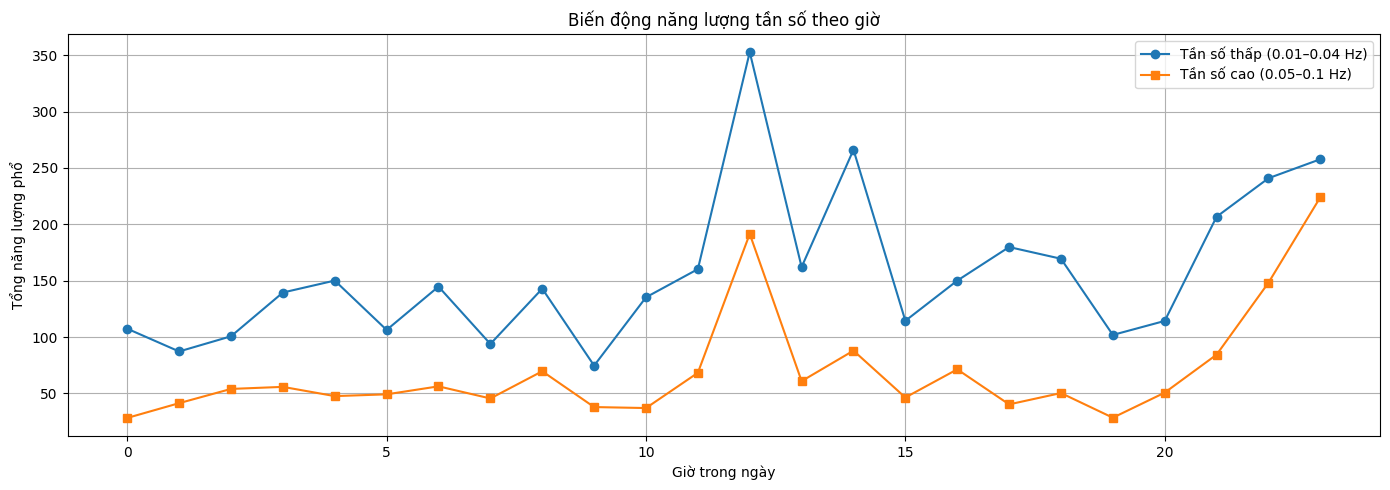

In [6]:
# Vẽ năng lượng theo giờ
hours = np.arange(24)
plt.figure(figsize=(14, 5))
plt.plot(hours, low_freq_powers, label="Tần số thấp (0.01–0.04 Hz)", marker="o")
plt.plot(hours, high_freq_powers, label="Tần số cao (0.05–0.1 Hz)", marker="s")
plt.title("Biến động năng lượng tần số theo giờ")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Tổng năng lượng phổ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Phát hiện bất thường
threshold_low = np.mean(low_freq_powers) + 2 * np.std(low_freq_powers)
threshold_high = np.mean(high_freq_powers) + 2 * np.std(high_freq_powers)

print(" Các giờ có năng lượng bất thường:")

for i in range(24):
    if low_freq_powers[i] > threshold_low:
        print(f" Giờ {i}: Tăng năng lượng tần số thấp -> Có thể là chậm nhịp tim, ngưng tim.")
    if high_freq_powers[i] > threshold_high:
        print(f" Giờ {i}: Tăng năng lượng tần số cao -> Có thể là tim đập nhanh, loạn nhịp.")

 Các giờ có năng lượng bất thường:
 Giờ 12: Tăng năng lượng tần số thấp -> Có thể là chậm nhịp tim, ngưng tim.
 Giờ 12: Tăng năng lượng tần số cao -> Có thể là tim đập nhanh, loạn nhịp.
 Giờ 23: Tăng năng lượng tần số cao -> Có thể là tim đập nhanh, loạn nhịp.
